In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 기초 통계 개념정리
## 1) 대표값 : 데이터의 중심을 나타내는 값
* 평균(mean)
* 중앙값(median)
* 최빈값(mode)

### (1) 평균(mean) $ \mu $
* 극단 값의 총합을 값의 개수로 나눈 값
* 극단적인 값(이상값/아웃라이어)이 있는 경우 평균에 영향을 미친다.
* 모집단의 평균 $ \mu $
* 표본집단의 평균  $ \bar[x] $
<br>
$$ 모평균: \mu = {\sum_{i=1}^N x_i \over n} $$
$$ 표본평균: \bar[x] = {\sum_{i=1}^N x_i \over n} $$

In [2]:
# 평균
a = pd.DataFrame([2,3,3,4,4,5,7,7,7,8], columns=['표본'])

In [3]:
# 평균
a.mean()

표본    5.0
dtype: float64

### (2) 중앙값(median)
* 모든 데이터를 큰 순서대로 나열할 때 가운데 값
* 데이터의 개수가 홀수일 때는 정중앙의 값
* 데이터의 개수가 짝수일 때는 정중앙 2개 수의 평균값
* 이상치가 있어도 영향을 받지 않는다.

In [4]:
a.T

,0,1,2,3,4,5,6,7,8,9
표본,2,3,3,4,4,5,7,7,7,8


In [5]:
#중앙값
a.median()

표본    4.5
dtype: float64

In [6]:
b = a.copy()

In [7]:
b.drop(0, inplace=True)
b

,표본
1,3
2,3
3,4
4,4
5,5
6,7
7,7
8,7
9,8


In [8]:
b.T

,1,2,3,4,5,6,7,8,9
표본,3,3,4,4,5,7,7,7,8


In [9]:
b.median()

표본    5.0
dtype: float64

### (3) 최빈값
* 표본에서 가장 많이 등장하는 값
* 최빈값도 극단값에 영향을 받지 않음

In [10]:
a.mode()

,표본
0,7


### (4) 산술 평균 / 기하 평균
* 산술평균(덧셈의 평균) : 모든 데이터의 합계 / 데이터 수
* 기하평균(곱셈의 평균) : 모든 데이터의 곱의 n 제곱근 - 증가율의 평균을 계산할 때 사용

In [11]:
a.T

,0,1,2,3,4,5,6,7,8,9
표본,2,3,3,4,4,5,7,7,7,8


In [12]:
# 산술평균
# (2+3+3+4+4+5+7+7+8) / 10
print(a.mean())
print("a의 산술평균:", (2+3+3+4+4+5+7+7+8) /10)

표본    5.0
dtype: float64
a의 산술평균: 4.3


In [13]:
# 기하평균
math.pow((2*3*3*4*4*5*7*7*8), 1/10)

3.7598009728044874

In [14]:
from scipy.stats import gmean
geometric_mean = gmean(a['표본'])
print("기하평균:", geometric_mean)

기하평균: 4.567459024554637


2020년에 7%, 2021년에 35%, 2022년에 40%, 2023년에 69%의 매출 증가가 있었다면 4년간 평균 매출 증가율은?

In [15]:
print('산술평균:', pd.Series([7, 35, 40, 69]).mean())
print('기하평균:', gmean([7, 35, 40, 69]))

산술평균: 37.75
기하평균: 28.67601451933219


## 2) 도수 분포표와 히스토그램
### (1) 도수분포표
* 주어진 데이터를 일정한 범위로 나누고 그 범위에 출현하는 데이터 개수를 조사해 나타낸 표
* 데이터의 구간 폭을 '계급'(class), 각 계급에 속하는 데이터 개수를 '도수'라고 한다.
* 각 계급의 중앙값을 '계급값'이라고 한다.
* 도수분포표에서 도수가 큰 것을 '출현 횟수가 많다'고 하고
* 가장 도수가 큰 계급의 계급값을 '최빈값'이라고 한다.

In [16]:
# 타이타닉 데이터 로딩
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")

In [17]:
# 나이 컬럼만 가져오기
ages = data[['Age']]
ages

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [18]:
#value_counts
ages.value_counts()

Age 
24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
        ..
53.0     1
66.0     1
70.5     1
74.0     1
80.0     1
Name: count, Length: 88, dtype: int64

In [19]:
# 계급 구간을 10단위로 나누어 도수분포표 만들고
# 도수분포표를 시각화한 히스토그램 그려보기
# 도수분포표(Frequency Distribution Table)
bins = (0, 10, 20, 30, 40, 50, 60, 70, 80, 90)
labels = ('under10s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s')
fdt = pd.cut(ages['Age'].values, bins=bins, labels=labels, right=False)
fdt.value_counts() # age 컬럼의 도수분포표

under10s     62
10s         102
20s         220
30s         167
40s          89
50s          48
60s          19
70s           6
80s           1
Name: count, dtype: int64

<Axes: >

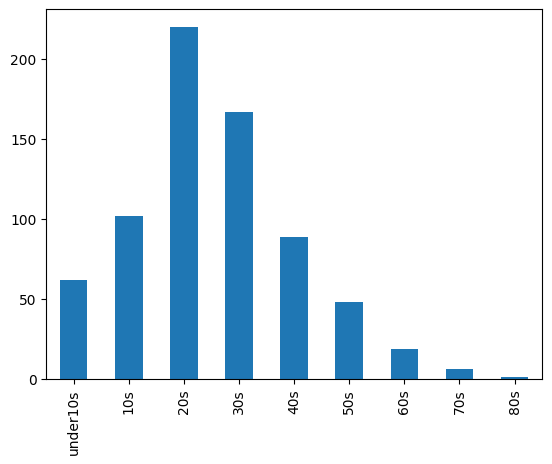

In [20]:
fdt.value_counts().plot(kind ='bar')

<Axes: xlabel='Age', ylabel='Count'>

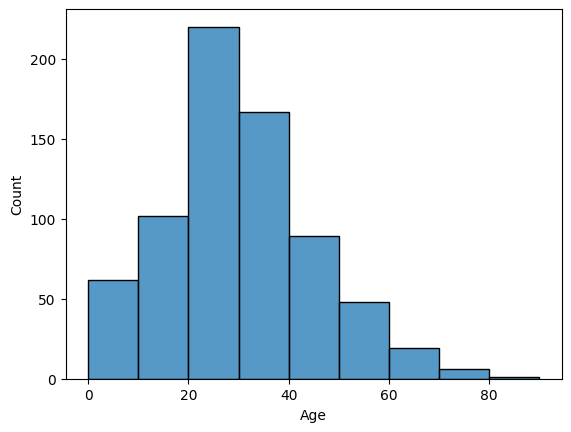

In [21]:
sns.histplot(ages['Age'], bins=bins)

In [22]:
## (2) 상대도수분포표(Relative Frequency Distribution Table)
* 상대도수 : 계급의 도수 / 전체 도수의 합계, 어떤 계급의 도수가 전체 도수에서 몇 %를 차지하는지 나타내는 값
* 상대도수분포표 : 모든 계급의 상대 도수를 구해서 더한 것

SyntaxError: invalid syntax (3020772528.py, line 2)

In [ ]:
fdt_df = pd.DataFrame(fdt.value_counts())
fdt_df

In [ ]:
# 상대도수분포표 만들기
# 상대도수 : 계급의 도수 / 전체 도수의 합계

In [ ]:
fdt_df['rfdt'] = round(fdt_df['count'] / fdt_df['count'].sum(), 3) * 100

In [ ]:
fdt_df

In [ ]:
fdt_df['rfdt'].plot(kind='bar')

In [ ]:
sns.histplot(ages['Age'], bins=bins, stat = 'probability', kde=False)

### 구간화가 필요한 데이터에서 계급의 개수를 몇개로 해야할지?
* 스터지스 공식: 도수분포표나 히스토그램을 만들 때 계급의 수가 적당한지 판단하는 기준이 되는 공식
* 전체 데이터 개수를 $ 2^n $ 이라 하고, 그때 계급 수를 $ n + 1 $ 한다.

In [ ]:
len(ages['Age'])

In [ ]:
# 891은 2의 몇 승? = n, n + 1
n = math.log(891, 2)

In [ ]:
print(round(n + 1))

## 3) 편차(deviation)
* 데이터와 평균이 떨어진 거리, 데이터와 평균 값과의 차이
* 데이터 - 평균값

In [ ]:
a

In [ ]:
a['평균'] = a['표본'].mean()
a

In [ ]:
a['편차'] = a['표본'] - a['평균']
a

## 4) 분산: 편차 제곱의 합 / 데이터 수
* 모분산: $ \sigma^2 $ <br>
$ \sigma^2 = {\sum(x_i-\mu)^2 \over N} $ <br>

* 표본분산: $ s^2 $ <br>
$ s^2 = {\sum(x_i-\bar{x})^2 \over n-1} $ <br>

In [ ]:
# 분산 : 편차 제곱의 합 / 데이터 수
a['편차제곱'] = (a['편차'] ** 2)
a['분산'] = (a['편차'] ** 2).sum() / len(a['편차제곱'])

In [ ]:
 a

In [ ]:
# 분산함수 .var() -> 표본분산 구해주는 함수
a['표본'].var()

In [ ]:
a['표본분산'] = a['편차제곱'].sum() / (len(a['편차제곱']) -1)
a

## 5) 표준편차: 분산의 제곱근
* 모집단의 표준편차 $ \sigma $ <br>
$ \sigma = \sqrt{\sum(x_i-\mu)^2 \over n} $ <br>
* 표본 집단의 표준편차 $ s $ <br>
$ s = \sqrt{\sum(x_i-\bar{x})^2 \over n-1} $ <br>

In [ ]:
a['표준편차'] = a['분산'].apply(math.sqrt)
a

In [ ]:
# 표준편차를 구하는 함수 .std() -> 표본의 표준편차
a['표본'].std()

In [ ]:
a['표본표준편차'] = a['표본분산'].apply(math.sqrt)
a

In [ ]:
a['표본'].describe()

## 6) 표준점수(standard score), z-점수(z-score)
* 데이터 포인트(값)가 평균으로부터 얼마나 떨어져 있는지를 나타내는 지표
* 이는 데이터 포인트가 평균에서 몇 표준편차 떨어져 있는지를 나타내며,
* 데이터의 상대적인 위치를 이해하는데 유용하다.

* 모집단 표준점수(Z-score) z<br>
$ Z = {x_i-\mu \over \sigma}  $<br><br>

* 표본집단 표준점수(Z-score) z<br>
$ Z = {x_i-\bar{x} \over s}  $<br><br>

# 자유도(degrees of freedom)란?
* 데이터의 독립적인 정보의 수
* [2,3,4,5,6] 의 평균?
* 통계는 표본을 추출해서 계산
* 모평균 4.0
* 표본평균 4.0
* 평균값을 유지하기 위해서 마지막 데이터 포인트는 고정되어야하고
* 고정된 포인트 이외의 값들은 자유롭게 변할 수 있다.
* n-1

In [ ]:
pd.Series([2,3,4,5,6]).mean()

In [ ]:
# [2,3,4,5,6] 전체 = 모집단
( 2+ 3+ 4+ 5+ 6) / 5

In [ ]:
# 표본 [4,2,5,7,x] 의 평균 = 4.0

In [ ]:
sum([4,2,5,7,2]) / 5

# 가설 검정 T-test
* t-test는 두 집단의 평균을 비교하여 차이가 있는지 확인하는 통계적 방법

In [ ]:
### 1) 일 표본 단측 t-검정 ( 한쪽으로 방향성을 갖는 경우

In [ ]:
pip install statsmodels

### 1) 일 표본 단측 t-검정( 한 쪽으로 방향성을 갖는 경우)
* 모수에 대한 검정을 할 때 모수 값이 ~보다 크다. 혹은 ~보다 작다 같이 한쪽으로의 방향성을 갖는 경우 수행되는 검정 방법
* 00공장에서 생산되는 지우개의 평균 중량은 50g 이하이다.(귀무가설)
* 00공장에서 생산되는 지우개의 평균 중량은 50g 초과이다.(대립가설)

In [ ]:
import statsmodels.stats.weightstats as stests
from scipy import stats

In [ ]:
# 일 표본 단측 t-검정을 위해 지우개 10개의 표본 추출
weights = np.random.uniform(49,52, 10)
print(weights)
print("지우개의 평균:", weights.mean())

In [ ]:
# 일 표본 단측 t-test
t_stat, p_value = stats.ttest_1samp(weights, 50, alternative = 'greater')
print(f"T-통계량: {t_stat}, P-value: {p_value}")

* p-value가 0.004이므로 유의수준 0.05보다 작기 때문에 귀무가설은 기각, 대립가설 채택
* 00공장에서 생산되는 지우개의 평균 중량은 50초과이다(대립가설 채택)

### 2) 일 표본 양측 t-test(방향성이 없는 경우)
* 단측 검정과 달리 모수 값이 ~이다. ~이 아니다 와 같이 방향성이 없는 경우 수행되는 검정 방법
* 대한민국 남성의 평균 몸무게는 70kg이다(귀무가설)
* 대한민국 남성의 평균 몸무게는 70kg이 아니다(대립가설)

In [ ]:
# 일 표본 양측 t-test를 위한 40kg - 100kg 사이 남성 100명의 표본을 추출
weights = np.random.uniform(40, 100, 100)
print(len(weights))
print("몸무게 평균", round(weights.mean()))

In [ ]:
# 일 표본 양측 t-test
t_stat, p_value = stats.ttest_1samp(weights, 70, alternative = 'two-sided')
print(f"T-통계량: {t_start}, P-value: {p_value}")

### 3) 이 표본 t-test(independent sample t-test)
* 서로 독립적인 두 개의 집단에 대하여 모수(모평균)의 값이 같은 값을 갖는지 통계적으로 검정하는 방법
* 여기서 독립이란 두 모집단에서 각각 추출된 두 표본이 서로 관계가 없다는 것을 의미
* 두 모집단의 분산이 같음을 의미하는 등분산성을 만족해야 한다.
* 따라서 이 표본 T-검정을 수행하기 전에 등분산 검정(F-검정)을 먼저 수행해야 한다.

### 4) 이 표본 단측 t검정(~보다 크다 / 작다)
* 두 집단에 대해서 모수 비교를 할 때 A가 B보다 크다/작다를 비교하는 검정
* A 회사의 급여가 B회사의 급여보다 같거나 많다(귀무가설)

In [ ]:
# 랜덤하게 급여 생성 salaryA 250-380 사이 값 100개, salaryB 200-400 사이의 값 100
salaryA = np.random.uniform(250, 380, 100)
salaryB = np.random.uniform(200, 400, 100)
print("salaryA의 평균", salaryA.mean())
print("salaryB의 평균", salaryB.mean())

t_test, p_value = stats.ttest_ind(salaryA, salaryB, alternative = 'less')

print(f"T-통계량: {t_stat}, P-value: {p_value}")

### 5) 이 표본 양측 t 검정 (A와 B는 같다/다르다)
* K와 L의 달리기 속도는 같다(귀무가설)

In [ ]:
# 랜덤한 속도 생성(speedK : 30에서 40사이의 값 100개, speedL : 25에서 35 사이의 값 100개)
speedK = np.random.uniform(30, 40, 100)
speedL = np.random.uniform(25, 35, 100)

t_stat, p_value = stats.ttest_ind(speedK, speedL) #alternative - 크다 작다할 때만 사용함
print(f"T-통계량: {t_stat}, P-value: {p_value}")

### 6) 대응 표본 t-검정(paird t-test)
* 실험 전 후 비교
* 동일한 대상에 대해 두 가지 관측치가 있는 경우 이를 비교하여 차이가 있는지 검정할 때 사용
* 두 집단에 신약 투여 후 전후 수치 비교, 새로운 정책이 시행된 후 부동산 가격의 전후 변화 등
* 새로운 운동법이 체중 감량의 효과가 있는지 검증하기 위해 새로운 운동법을 실시한 집단고 실시하지 않은 집단의 체중을 비교
* 새로운 운동법으로 체중 감량의 효과는 없다(운동 전 무게와 운동 후 무게 >= 0)(귀무가설) 

In [ ]:
# 대응 표본 t 검정을 위한 표본 추출
before = np.random.uniform(60, 80, 100)
after = before + np. random.normal(-3, 2, 100)

# 대응 표본 t 검정
t_stat, p_value = stats.ttest_rel(before, after, alternative = 'greater')
print(f"T-통계량: {t_stat}, P-value: {p_value}")

# 분산분석(ANOVA)
* 3개 이상의 모집단이 있을 경우 집단 사이의 평균을 비교
* 분산 분석의 귀무가설( $ H_O $ "모든 집단 간 평균은 같다"이다.
* 1) 분산 분석을 수행하기 위해서는 아래의 세가지 가정 사항을 필요로 한다.
  * 정규성 : 각 집단의 표본들은 정규분포를 따라야 한다.
  * 등분산성 : 각 집단은 동일한 분산을 가져야 한다.
  * 독립성 : 각 집단은 서로에게 영향을 주지 않는다.
  2) 분산 분석
  * 분산분석의 독립변수는 범주형 데이터여야 하고, 종속변수는 연속형이어야 한다.
  * 분산분석에는 '(집단 간 분산)/(집단 내 분산)'으로 계산되는 F-value가 사용된다.
  * F-value가 커지면 p-value가 작아진다.
  * 평균을 비교하는 분산분석에 '분산'의 개념을 사용하는 이유는 집단 간 평균의 분산이 클수록 각 집단의 평균은 서로 멀리 떨어져 있기 때문에 집단 간 차이를 비교하기 쉬워진다.

### 1) 일원분산분석(one-way Anova)
* 셋 이상의 집단 간 평균을 비교하는 상황에서 하나의 집단에 속하는 독립변수와 종속변수가 모두 한 개 일 때 사용
* 예) 연령대 별(청소년, 성인, 노인) 유투브 시청 시간의 차이
    * 독립 변수는 연령별 집단(청소년, 성인, 노인), 종속변수(유투브 시청 시간)
    * 셋 이상의 집단이지만 독립변수는 '연령별 집단' 하나
* 일원 분산분석
* 신형 휴대폰 A, B, C의 속도 차이가 있는지 여부
* 귀무가설($ H0 $): A, B, C라는 세 대의 신형 휴대폰 간의 속도 차이는 없다.
* 대립가설($ H1 $): A, B, C라는 세 대의 신형 휴대폰 간의 속도 차이가 있다.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# 분산분석을 위한 데이터 생성
np.random.seed(0)
phone_speed = np.random.uniform(75, 100, 45)
telecom = np.tile(['A', 'B', 'C'], 15)
print("phone_speed", phone_speed)
print("telecom", telecom)

In [ ]:
phone_data = pd.DataFrame(dict(phone_speed=phone_speed, telecom=telecom))
phone_data

In [ ]:
# 분산 분석 수행
model = ols('phone_speed ~ C(telecom)', data=phone_data).fit()
# print(model.summary())
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)